In [1]:
#import required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,  mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Load train and test dataset in pandas  DataFrame
train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.shape

(5681, 11)

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
#combine Train and test data
train["source"] = "train"
test["source"] = "test"

data = pd.concat([train, test], ignore_index = True)
print(data.shape)

(14204, 13)


In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
# Describe Function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
#print the unique value in Item_Fat_Content column
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
#print the unique value in Outlet_Establishment_Year column
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
#calculate Outlet age
data["Outlet_age"] = 2023 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [14]:
#print the unique value in Outlet_Establishment_Year column
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
# print the count  value of Item_Fat_Content column
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [16]:
# print the count  value of Outlet_Size column
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
#use mode function to find out the mst common value in column
data["Outlet_Size"].mode()[0]


'Medium'

In [18]:
data["Item_Weight"].mean()

12.792854228644991

In [19]:
data["Item_Weight"].value_counts()

17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64

In [20]:
#Two variables missing values Outlet_Size & Item_Weight
#Replace missing values in Outlet_Size with medium

data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [21]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot: >

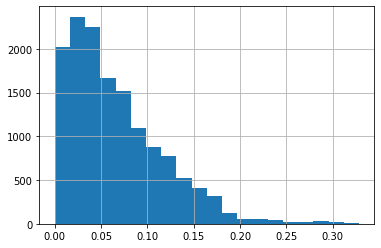

In [22]:
#plot a histrogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins =20)

In [23]:
data["Item_Visibility"].value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

# How to Detect Outliers Using the Interquartile Range (IQR)


* In statistics, interquartile range or IQR is a quantity that measures the difference between the first and the third quartiles in a given dataset.

* The first quartile is also called the one-fourth quartile, or the 25% quartile.
* If q25 is the first quartile, it means 25% of the points in the dataset have values less than q25.
* The third quartile is also called the three-fourth, or the 75% quartile.
* If q75 is the three-fourth quartile, 75% of the points have values less than q75.
   Using the above notations, IQR = q75 - q25.

# How to Detect Outliers Using Percentile

* Detecting Outlier
* An outlier is a data point that lies ouside  portion of the  overall  distribution
* A common used rule states that a data point is as outlier  if it is more tha 1.5*IQR above the third quartile and below the first quartlie
* Using this , one can remove the outliers and output the resulting  data in fill data variable

In [24]:
# calaculate the first quartile for Item_Visibility
Q1 = data["Item_Visibility"].quantile(0.25)
Q1

0.027035682499999998

In [25]:
# calaculate the third quartile for Item_Visibility
Q3 = data["Item_Visibility"].quantile(0.75)
Q3

0.0940372535

In [26]:
IQR = Q3 - Q1
IQR

0.06700157100000001

* As discussed earlier, the interquartile range works by dropping all points that are outside the range [q25 - 1.5*IQR, q75 + 1.5*IQR] as outliers.

In [27]:
# Now the IQR range is known Remove the outlier from the data 
# the resulting data store in fill_data variable
fill_data = data.query("(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR) ")

In [28]:
fill_data
fill_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,26
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,14
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,21
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,16


In [29]:
#chech the shape of the data without outlier
fill_data.shape

(13943, 14)

In [30]:
#chech the shape of the data with outlier
data.shape

(14204, 14)

In [31]:
#Assign fill_data set data set dataframe
data = fill_data
data.shape

(13943, 14)

In [32]:
# Modify Item visibility by converting the numerical values into the category low visibility ,  visibility and high visibility
data["Item_Visibility_bins"] =  pd.cut(data["Item_Visibility"] ,[0.000 , 0.065 , 0.13 , 0.2] ,labels = ["Low viz", "Viz" , "High Viz"])

In [33]:
data["Item_Visibility_bins"].value_counts()

Low viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [34]:
#replace nun values with low Viz
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan , "Low viz" , regex = True)


In [35]:
# We found typos and diiferences in representation in categories of Item_Fat_Content variable
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat" , "LF"], "Low Fat")


In [36]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [37]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [38]:
# initialize the label encoder
le = LabelEncoder()

In [39]:
#transform  Item_Visibility_bins data
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])

In [40]:
#transform  Item_Fat_Content data
data["Item_Fat_Content"]= le.fit_transform(data["Item_Fat_Content"])

In [41]:
#transform  Outlet_Size data
data["Outlet_Size"]= le.fit_transform(data["Item_Fat_Content"])

In [42]:
#transform  Outlet_Location_Type data
data["Outlet_Location_Type"]= le.fit_transform(data["Outlet_Location_Type"])

In [43]:
#print unique value of Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [44]:
# create dummies values for Outlet_Type
dummies = pd.get_dummies(data["Outlet_Type"])
dummies.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [45]:
# Explore the column  Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [46]:
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [47]:
#As multiplier categories are present reduce it by mapping
data["Item_type_combine"] = data["Item_Identifier"].apply(lambda x : x[0:2])
data["Item_type_combine"] = data["Item_type_combine"].map({"FD":" Food",
                                                          "NC" : "Non_consumable",
                                                          "DR": "Drinks"})

In [48]:
data["Item_type_combine"].value_counts()

 Food             9991
Non_consumable    2652
Drinks            1300
Name: Item_type_combine, dtype: int64

In [49]:
data.shape

(13943, 16)

In [50]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Outlet_age                     int64
Item_Visibility_bins           int32
Item_type_combine             object
dtype: object

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
#Drop the column which have been converted into different type
data.drop(["Item_Type" , "Outlet_Establishment_Year"] ,axis = 1, inplace = True)

In [53]:
#Divide the dataset Create earlier into train and test dataset
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

In [54]:
#Drop unnecessary columns
test.drop(["Item_Outlet_Sales", "source"],axis = 1 , inplace =True)
train.drop(["source"],axis = 1 , inplace =True)

In [55]:
#Export modified version of the files
train.to_csv("train_modified.csv", index = False)
test.to_csv("test_modified.csv",index = False)

In [56]:
#Read train_modified.csv and test_modified.csv
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [57]:
#Print data type of train2 column
train2.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content          int64
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int64
Outlet_Location_Type      int64
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_age                int64
Item_Visibility_bins      int64
Item_type_combine        object
dtype: object

In [58]:
#Drop the irrelevent data set from train2
#create the independent variable X_Train and dpendent variable y_train
X_train = train2.drop(["Item_Outlet_Sales","Outlet_Identifier" , "Item_Identifier","Outlet_Type" ,"Item_type_combine"] ,axis =1)
y_train = train2.Item_Outlet_Sales

In [59]:
#Drop the irrelevent data set from test2
X_test = test2.drop(["Outlet_Identifier" , "Item_Identifier" ,"Outlet_Type", "Item_type_combine"] ,axis =1)

In [60]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_age,Item_Visibility_bins
0,20.750000,0,0.007565,107.8622,0,0,24,1
1,8.300000,1,0.038428,87.3198,1,1,16,1
2,14.600000,0,0.099575,241.7538,0,2,25,2
3,7.315000,0,0.015388,155.0340,0,1,16,1
4,12.792854,1,0.118599,234.2300,1,2,38,2
...,...,...,...,...,...,...,...,...
5563,10.500000,1,0.013496,141.3154,1,0,26,1
5564,7.600000,1,0.142991,169.1448,1,2,14,0
5565,10.000000,0,0.073529,118.7440,0,1,21,2
5566,15.300000,1,0.000000,214.6218,1,1,16,3


In [61]:
X_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_age,Item_Visibility_bins
0,9.30,0,0.016047,249.8092,0,0,24,1
1,5.92,1,0.019278,48.2692,1,2,14,1


In [62]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [63]:
#impor sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [64]:
#create train and test split
x_train , x_test ,y_train , y_test = model_selection.train_test_split(X_train , y_train , test_size = 0.3 ,random_state = 42)

In [65]:
#fit linear regression in trainning data set
lin = LinearRegression()


In [66]:
lin.fit(x_train , y_train)

LinearRegression()

In [68]:
#find the coefficient and intercept of the line
#use x_trin and y_train for linear Regression
print(lin.coef_)
lin.intercept_

[   -4.11557245    26.97702497 -2511.10286485    15.87421818
    26.97702497   144.47181843    12.62179478    28.95034125]


-341.6251823350326

In [69]:
#predict the test set result of training data set
predictions = lin.predict(x_test)
predictions

array([2169.85550772, 2636.97951709, 2766.31882006, ..., 3263.06223084,
       3405.67046608,  933.79261944])

In [70]:
import math

In [71]:
#FInd the RMSE for the model
print(math.sqrt(mean_squared_error(y_test ,predictions)))

1383.85585170487


In [73]:
y_sales_predict = lin.predict(X_test)
y_sales_predict

array([1598.08212041, 1343.1781995 , 3848.28637968, ..., 1784.9796682 ,
       3489.58544768, 1144.39716359])

In [76]:
test_prediction = pd.DataFrame({"Item_Identifier" : test2["Item_Identifier"],
                              "Outlet_Identifier" : test2["Outlet_Identifier"],
                                "Item_Outlet_sales" :y_sales_predict},
                              columns = ["Item_Identifier" , "Outlet_Identifier", "Item_Outlet_sales"])

In [77]:
test_prediction

,Item_Identifier,Outlet_Identifier,Item_Outlet_sales
0,FDW58,OUT049,1598.082120
1,FDW14,OUT017,1343.178200
2,NCN55,OUT010,3848.286380
3,FDQ58,OUT017,2426.041985
4,FDY38,OUT027,3906.554518
...,...,...,...
5563,FDB58,OUT046,2235.612840
5564,FDD47,OUT018,2472.675892
5565,NCO17,OUT045,1784.979668
5566,FDJ26,OUT017,3489.585448
